# Animación

Vamos a construir una función que permita animar $f(x,t)$ graficada en algun intervalo $[x_0,x_f]\times[t_0,t_f]$ con un intervalos $dx$ y $dt$.

Vamos a usar las librerias siguientes.

In [7]:
# Cargamos las librerias necesarias 

# Herramientas matematicas
import numpy as np
# Herramientas para ploteo
import matplotlib.pyplot as plt

# Modulo de animacion
from matplotlib import animation, rc
# Modulo para mostrar la animacion en el notebook
from IPython.display import HTML

# Importamos la division de python 3
from __future__ import division

Definimos la función animar. Por defecto en el intervalo $[0,1]\times[0,1]$ con un paso de $0.01$ en $dx$ y $dt.

In [8]:
def animar(f,x0=0,xf=1,dx=0.01,t0=0,tf=1,dt=0.01, ym=-2, yM= 2):
    """
    Funcion para realizar animaciones. Toma como entrada una funcion
        f(x,t)
    donde el primer argumento es la coordenada espacial y el segundo la temporal.
    
    Requiere tener instalada en el sistema operativo la libreria ffmpeg.
    
    Ademas pide como argumento de entrada
        x0 - la coordenada x inicial
        xf - la coordenada x final
        dx - el valor entre dos puntos sucesivos de x
        t0 - la coordenada t inicial
        tf - la coordenada t final
        dt - el valor entre dos puntos sucesivos de t
        ym - Valor minimo para y
        yM - Valor maximo para y
        
    ademas
    
        filename - archivo para guardar la animacion.
            
    Esta harcodeado el tiempo entre dos frames en 5ms. Pero se puede cambiar cambiando el valor de 
        `interval` que aparece mas abajo.
    """
    # Definimos los intervalos para graficar
    x = np.linspace(x0,xf,int((xf-x0)/dx))
    t = np.linspace(t0,tf,int((tf-t0)/dt))
    
    # Ponemos los ejes para la figura
    fig, ax = plt.subplots()

    ax.set_xlim((x0, xf))
    ax.set_ylim((ym, yM))

    line, = ax.plot([], [], lw=2)
    
    # Definimos la funcion que crea un grafico vacio
    def init():
        line.set_data([], [])
        return (line,)
    
    # Funcion que crea cada frame
    def animate(i):
        y = f(x,i)
        line.set_data(x, y)
        return (line,)
    # Creamos el objeto animado
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=t, interval=20, blit=True)
    plt.show()
    return anim

## Ejemplo: onda estacionaria
$f(x,t) = \cos(2\pi x)\sin(2\pi t)$$

In [9]:
# Definimos la funcion que queremos animar
def f(x,t):
    return np.cos(2*np.pi*x)*np.sin(2*np.pi*t)

Hacemos la animacion

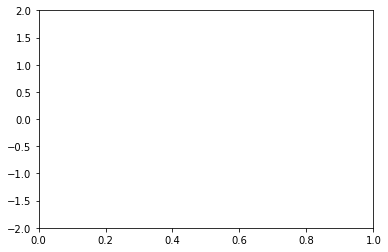

In [10]:
anim = animar(f);

In [11]:
anim.save("paquete.mp4")

/home/bionic/.local/lib/python3.5/site-packages/matplotlib/animation.py:1218: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


## Ejemplo: onda viajera
$f(x,t) = \cos(2\pi x-2\pi t)$$

In [5]:
# Definimos la funcion que queremos animar
def f(x,t):
    return np.cos(2*np.pi*x-2*np.pi*t)

Hacemos la animacion

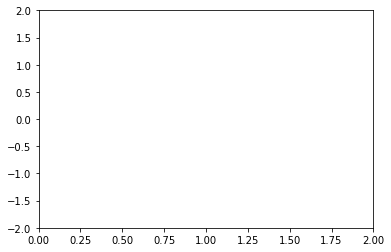

In [6]:
anim = animar(f,x0=0,xf=2);

## Ejemplo: Gaussiana con centro que se mueve
$f(x,t) = e^{-(x-t)**2}$$

In [21]:
# Definimos la funcion que queremos animar
def f(x,t):
    return np.exp(-(x-(t-1))**2/0.1**2)

Hacemos la animacion

In [22]:
anim = animar(f,x0=-1,xf=1,t0=0,tf=2);

## Ejemplo: Oscilador armónico
Como ultimo ejemplo vamos a mostrar como construir las autofunciones del oscilador armonico unidimensional con `sympy`, convertirlas en una función para python y graficarla.

Comenzamos definiendo las autofunciones del oscilador armonico.

In [23]:
# Importamos sympy
import sympy as sy
sy.init_printing()

In [24]:
# Definimos las funciones phi(n,x)
x = sy.symbols('x', real=True)
t = sy.symbols('t', real=True)
n = sy.symbols('n', integer=True)
def phi(n,x):
    arg = 2**n*sy.gamma(n+1)*sy.sqrt(sy.pi)
    psi = 1/sy.sqrt(arg) * sy.exp(-x**2/2) * sy.hermite_poly(n, x)
    return psi

Movemos la autofuncion de n=0 a 0.5 y la guardamos como $f_0$

In [25]:
f0 = phi(0,x-0.5)

Calculamos los primeros 5 coeficientes de $f_0$ en la base del oscilador armónico.

In [26]:
N = 5
a = np.zeros(N)
for i in range(N):
    an = sy.integrate(f0.conjugate()*phi(i,x),(x,-sy.oo,sy.oo))
    a[i] = an.evalf()

Vemos que está normalizada calculando la suma de los cuadrados.

In [27]:
sum(a**2)

Definimos las energias como

In [28]:
def E(i):
    return i+0.5

Con todo lo anterior definimos la funcion a animar como

$$ f(x,t) = \sum a_n e^{-iE_n t} \phi_n(x)$$

In [29]:
# Definimos la funcion que queremos animar
fsy = 0
for i in range(N):
    temp = a[i]*sy.exp(sy.I*E(i)*t)*phi(i,x)
    fsy = fsy + temp

Calculamos con esto la probabilidad como el modulo cuadrado. Como la parte imaginaria es cero, nos quedamos solo con la parte real

In [30]:
p = fsy.conjugate()*fsy
print(sy.im(p))
p = sy.re(p)

0


Usamos `lambdify` de `simpy` para convertir la función simbolica en numerica con el parametro `numpy` para poder usarla con arrays y la mostramos para t=0.

In [31]:
f = sy.lambdify((x,t),p,'numpy')

In [32]:
x = np.linspace(-3,3,100)
plt.plot(x,f(x,0))
plt.show()

Hacemos la animacion

In [33]:
anim = animar(f,\
                x0=-3,xf=3,dx=0.01, \
                t0=0,tf=2*np.pi,dt=0.03,\
                ym=0,yM=0.6);

## Guardado de animaciones

En el caso que se quieran guardar las animaciones es necesario tener instalada la libreria ffmpeg en el sistema operativo. En ubuntu se instala como

`sudo apt-get intall ffmpeg`

Para guardar la animación hacemos

`anim.save("nombre.mp4")

In [34]:
anim.save("paquete.mp4")

[]